In [46]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

import time
import keras
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD

#Optional layer to be added, in place of Dropout layer
#from keras.layers.normalization import BatchNormalization

% matplotlib inline
np.random.seed(123)

/Users/tylerkistler/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"%train_features.shape[1])
print("Image columns: %d"%train_features.shape[2])
print("Number of classes: %d"%num_classes)


train_features = train_features.reshape(train_features.shape[0], 1, img_rows, img_cols).astype('float32')
test_features = test_features.reshape(test_features.shape[0], 1, img_rows, img_cols).astype('float32')
train_features /= 255
test_features /= 255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


In [3]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.3999 - acc: 0.8907 - val_loss: 0.1886 - val_acc: 0.9482
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/step - loss: 0.1477 - acc: 0.9573 - val_loss: 0.1104 - val_acc: 0.9722
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.1001 - acc: 0.9717 - val_loss: 0.0868 - val_acc: 0.9785
Epoch 4/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0793 - acc: 0.9779 - val_loss: 0.0809 - val_acc: 0.9785
Epoch 5/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0675 - acc: 0.9810 - val_loss: 0.0724 - val_acc: 0.9808
Epoch 6/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0593 - acc: 0.9831 - val_loss: 0.0662 - val_acc: 0.9812
Epoch 7/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0526 - acc: 0.9849 - val_loss: 0.0673 - val_acc

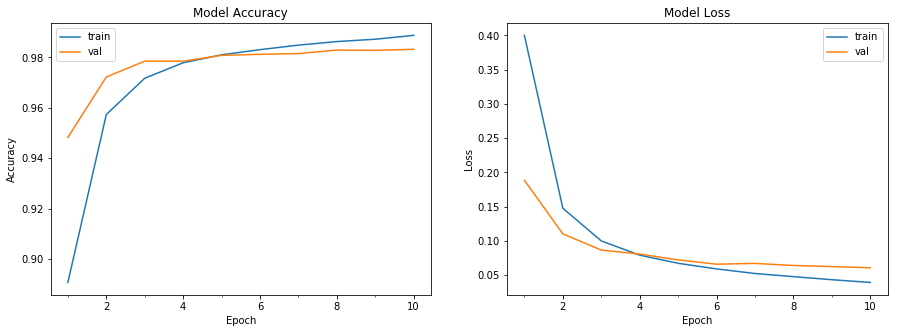

Model took 620.45 seconds to train
Accuracy on test data is: 98.16


In [7]:
# Basic CNN
model1 = Sequential()
model1.add(Convolution2D(32, (3, 3), padding='valid', input_shape=(1, 28, 28))) 
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(num_classes))
model1.add(Activation("softmax"))
# Compile the model
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model1_info = model1.fit(train_features, train_labels, batch_size=128, epochs=10, verbose=1, validation_split=0.1666666)
end = time.time()
# plot model history
plot_model_history(model1_info)
print("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 60s 1ms/step - loss: 0.4265 - acc: 0.8954 - val_loss: 0.2805 - val_acc: 0.9147
Epoch 2/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.2410 - acc: 0.9269 - val_loss: 0.2325 - val_acc: 0.9309
Epoch 3/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.2349 - acc: 0.9294 - val_loss: 0.2666 - val_acc: 0.9132
Epoch 4/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.2189 - acc: 0.9329 - val_loss: 0.2265 - val_acc: 0.9310
Epoch 5/10
50000/50000 [==============================] - 61s 1ms/step - loss: 0.2237 - acc: 0.9325 - val_loss: 0.1983 - val_acc: 0.9394
Epoch 6/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2453 - acc: 0.9278 - val_loss: 0.2606 - val_acc: 0.9295
Epoch 7/10
50000/50000 [==============================] - 62s 1ms/step - loss: 0.2658 - acc: 0.9224 - val_loss: 0.2159 - val_acc

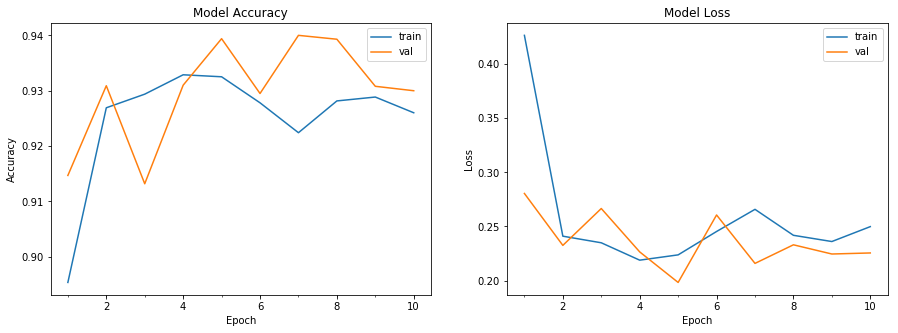

Model took 614.36 seconds to train
Accuracy on test data is: 92.88


In [8]:
# Basic CNN (with high LR)
model2 = Sequential()
model2.add(Convolution2D(32, (3, 3), padding='valid', input_shape=(1, 28, 28))) 
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(num_classes))
model2.add(Activation("softmax"))
# Compile the model
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model2_info = model2.fit(train_features, train_labels, batch_size=128, epochs=10, verbose=1, validation_split=0.1666666)
end = time.time()
# plot model history
plot_model_history(model2_info)
print("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 153s 3ms/step - loss: 0.1492 - acc: 0.9538 - val_loss: 0.0639 - val_acc: 0.9813
Epoch 2/10
50000/50000 [==============================] - 147s 3ms/step - loss: 0.0517 - acc: 0.9832 - val_loss: 0.0591 - val_acc: 0.9838
Epoch 3/10
50000/50000 [==============================] - 146s 3ms/step - loss: 0.0345 - acc: 0.9892 - val_loss: 0.0686 - val_acc: 0.9813
Epoch 4/10
50000/50000 [==============================] - 155s 3ms/step - loss: 0.0334 - acc: 0.9892 - val_loss: 0.0566 - val_acc: 0.9863
Epoch 5/10
50000/50000 [==============================] - 145s 3ms/step - loss: 0.0249 - acc: 0.9920 - val_loss: 0.0723 - val_acc: 0.9853
Epoch 6/10
50000/50000 [==============================] - 147s 3ms/step - loss: 0.0220 - acc: 0.9931 - val_loss: 0.0809 - val_acc: 0.9848
Epoch 7/10
50000/50000 [==============================] - 136s 3ms/step - loss: 0.0289 - acc: 0.9917 - val_loss: 0.0741 - 

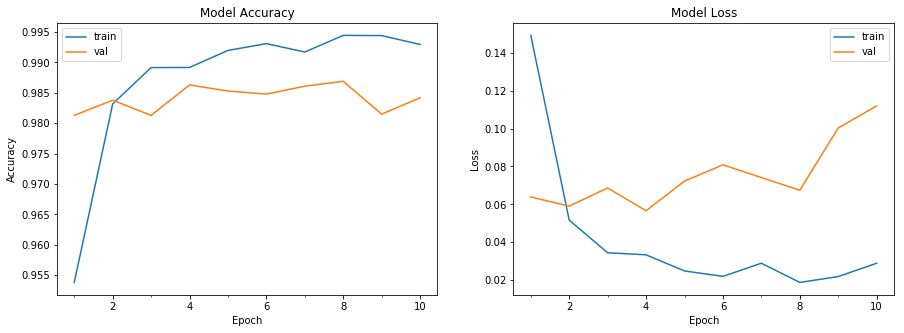

Model took 1458.26 seconds to train
Accuracy on test data is: 98.35


In [10]:
# CNN (added convolutional layer)
model3 = Sequential()
model3.add(Convolution2D(32, (3, 3), padding='valid', input_shape=(1, 28, 28)))
model3.add(Activation("relu"))
model3.add(Convolution2D(32, (3, 3),  padding='valid'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation("relu"))
model3.add(Dense(num_classes))
model3.add(Activation("softmax"))
# Compile the model
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model3_info = model3.fit(train_features, train_labels, batch_size=128, epochs=10, verbose=1, validation_split=0.1666666)
end = time.time()
# plot model history
plot_model_history(model3_info)
print("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model3))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 161s 3ms/step - loss: 0.3197 - acc: 0.9025 - val_loss: 0.0777 - val_acc: 0.9792
Epoch 2/10
50000/50000 [==============================] - 158s 3ms/step - loss: 0.1596 - acc: 0.9518 - val_loss: 0.0706 - val_acc: 0.9791
Epoch 3/10
50000/50000 [==============================] - 155s 3ms/step - loss: 0.1398 - acc: 0.9575 - val_loss: 0.0591 - val_acc: 0.9836
Epoch 4/10
50000/50000 [==============================] - 152s 3ms/step - loss: 0.1256 - acc: 0.9617 - val_loss: 0.0688 - val_acc: 0.9805
Epoch 5/10
50000/50000 [==============================] - 151s 3ms/step - loss: 0.1199 - acc: 0.9635 - val_loss: 0.0540 - val_acc: 0.9850
Epoch 6/10
50000/50000 [==============================] - 153s 3ms/step - loss: 0.1173 - acc: 0.9637 - val_loss: 0.0653 - val_acc: 0.9824
Epoch 7/10
50000/50000 [==============================] - 151s 3ms/step - loss: 0.1153 - acc: 0.9667 - val_loss: 0.0507 - 

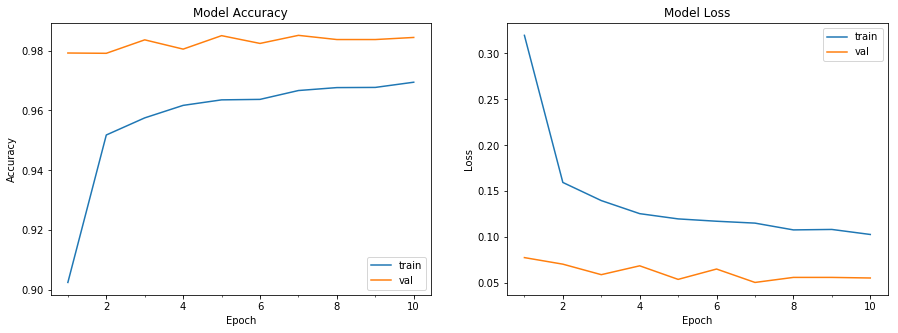

Model took 1541.21 seconds to train
Accuracy on test data is: 98.39


In [11]:
# Define the model
model4 = Sequential()
model4.add(Convolution2D(32, (3, 3), padding='valid', input_shape=(1, 28, 28)))
model4.add(Activation("relu"))
model4.add(Convolution2D(32, (3, 3),  padding='valid'))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Dropout(0.5))
model4.add(Activation("relu"))
model4.add(Dense(num_classes))
model4.add(Activation("softmax"))
# Compile the model
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model4.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model4_info = model4.fit(train_features, train_labels, batch_size=128, epochs=10, verbose=1, validation_split=0.1666666)
end = time.time()
# plot model history
plot_model_history(model4_info)
print("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model4))


In [54]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"%train_features.shape[1])
print("Image columns: %d"%train_features.shape[2])
print("Number of classes: %d"%num_classes)


train_features = train_features.reshape(train_features.shape[0], 1, img_rows, img_cols).astype('float32')
test_features = test_features.reshape(test_features.shape[0], 1, img_rows, img_cols).astype('float32')
train_features /= 255
test_features /= 255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


In [55]:
from sklearn.metrics import classification_report

#building CNN model
model5 = Sequential()
model5.add(Convolution2D(32, (5, 5), padding='valid', input_shape=(1, 28, 28)))
model5.add(Activation("relu"))
model5.add(Convolution2D(32, (5, 5),  padding='valid'))
model5.add(Activation("relu"))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128))
model5.add(Dropout(0.5))
model5.add(Activation("relu"))
model5.add(Dense(num_classes))
model5.add(Activation("softmax"))

#optimizer type initialization

#compiling model
model5.compile(loss='categorical_crossentropy', optimizer='adam')

#training model 
model5.fit(train_features,train_labels, batch_size=128,epochs=5, verbose=1,validation_split=0.1666666)

#evaluating
score=model5.evaluate(test_features,test_labels,verbose=1)
print(score,  "score")

print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model5))

pred = model5.predict(test_features, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(test_labels, axis=1), predicted)
print(report)

#predicting classes using MNIST test data
predicted_classes=model5.predict_classes(test_features)
print(predicted_classes.shape, "predicted_classes.shape")
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
correct_indices = np.nonzero(predicted_classes == test_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels)[0]

#saving model for future use
model5.save('my_model_conv2d.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 161s 3ms/step - loss: 0.2854 - val_loss: 0.0652
Epoch 2/5
50000/50000 [==============================] - 155s 3ms/step - loss: 0.0920 - val_loss: 0.0451
Epoch 3/5
50000/50000 [==============================] - 164s 3ms/step - loss: 0.0700 - val_loss: 0.0378
Epoch 4/5
50000/50000 [==============================] - 159s 3ms/step - loss: 0.0574 - val_loss: 0.0355
Epoch 5/5
10000/10000 [==============================] - 13s 1ms/step
0.0279467414562 score
Accuracy on test data is: 99.11
10000/10000 [==============================] - 13s 1ms/step
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.98      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99     

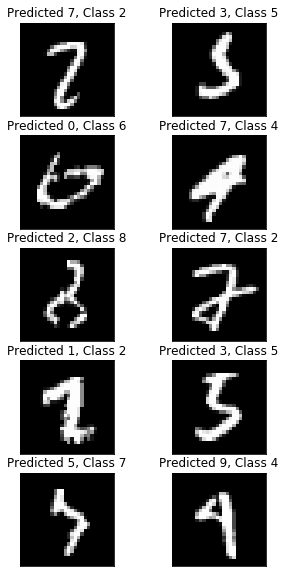

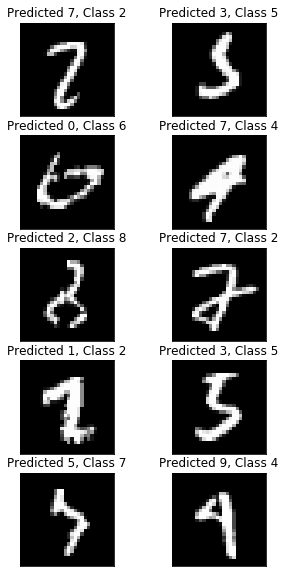

In [63]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

plt.rcParams['figure.figsize'] = (5,10)

figure_evaluation = plt.figure()

# plot 10 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:10]):
    plt.subplot(5,2,i+1)
    plt.imshow(test_features[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [70]:
# Reset
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
train_features = train_features.reshape(train_features.shape[0], 1, img_rows, img_cols).astype('float32')
test_features = test_features.reshape(test_features.shape[0], 1, img_rows, img_cols).astype('float32')
train_features /= 255
test_features /= 255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


In [71]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred = model5.predict(test_features,verbose=2)
y_pred = np.argmax(Y_pred,axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(test_labels,axis=1), y_pred)[ix].sum())
print(confusion_matrix(np.argmax(test_labels,axis=1), y_pred))

0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009
[[ 975    0    1    1    0    0    0    0    1    2]
 [   0 1130    1    4    0    0    0    0    0    0]
 [   0    3 1023    0    0    0    0    6    0    0]
 [   0    0    3 1005    0    1    0    1    0    0]
 [   0    0    0    0  976    0    1    1    0    4]
 [   1    0    1    7    0  881    1    0    0    1]
 [   4    2    1    0    1    3  946    0    1    0]
 [   0    2    3    1    0    1    0 1020    1    0]
 [   1    1    2    2    1    1    0    2  960    4]
 [   0    1    0    1    4    4    0    3    1  995]]
